In [26]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

Rosnący impuls wykładniczy dla zmiennej $\Omega$ i stałego t

In [27]:
omega_space = np.arange(0.1,10,0.05)

def rosnacyImpulsWykladniczy(t):
    plt.figure(figsize=(6,4))
    plt.grid()
    plt.plot(omega_space, omega_space * np.e**(omega_space*t), label=r'$\xi^2$, $t={}$'.format(round(t,1)))
    plt.legend()
    plt.show()

interact(rosnacyImpulsWykladniczy, t=(-5,0,0.1))

interactive(children=(FloatSlider(value=-3.0, description='t', max=0.0, min=-5.0), Output()), _dom_classes=('w…

<function __main__.rosnacyImpulsWykladniczy(t)>

Malejący impuls wykładniczy dla zmiennej $\Omega$ i stałego t

In [22]:
omega_space = np.arange(0.1,10,0.05)

def malejacyImpulsWykladniczy(t):
    plt.figure(figsize=(6,4))
    plt.plot(omega_space, omega_space * np.e**(-omega_space*t), label=r'$\xi^2$, $t={}$'.format(round(t,1)))
    plt.grid()
    plt.legend()
    plt.show()

interact(malejacyImpulsWykladniczy, t=(0,5,0.1))

interactive(children=(FloatSlider(value=2.0, description='t', max=5.0), Output()), _dom_classes=('widget-inter…

<function __main__.malejacyImpulsWykladniczy(t)>

Impuls gaussowski dla zmiennej $\Omega$ i stałego t

In [23]:
omega_space = np.arange(0.1,10,0.05)

def impulsGaussowski(t):
    plt.figure(figsize=(6,4))
    plt.plot(omega_space, ((omega_space**2)/(2*np.pi))**(1/2) * np.e**((-(omega_space**2 * t**2))/2), label=r'$\xi^2$, $t={}$'.format(round(t,2)))
    plt.grid()
    plt.legend()
    plt.show()

interact(impulsGaussowski, t=(-5,5,0.05))

interactive(children=(FloatSlider(value=0.0, description='t', max=5.0, min=-5.0, step=0.05), Output()), _dom_c…

<function __main__.impulsGaussowski(t)>

Wykres prawdopodobieństwa wystąpienia elektronu dla impulsu prostokątnego dla zmiennej $\Omega$ i stałego t i $\Gamma=1$

In [24]:
omega_space = np.arange(0.01, 20, 0.001)

def P_e(t, gamma, omega):
    if 0 <= t <= 2/omega:
        return gamma*np.e**(-gamma*t)*(((2/gamma)*np.sqrt(gamma/2)*(np.e**(gamma/omega) - 1))**2)
    elif t > 2/omega:
        return gamma*np.e**(-gamma*t)*((-(2/gamma)*np.sqrt(omega/2)*np.e**(gamma/omega))**2)
    else:
        raise ValueError


def Pe(t):
    plt.figure(figsize=(6,4))
    P_e_space = []
    for omega in omega_space:
        P_e_space.append(P_e(t, 1, omega))
    plt.plot(omega_space, P_e_space, label=f'$t$ = {round(t,2)}')
    plt.ylim(-2,20)
    plt.grid()
    plt.legend()
    plt.show()

interact(Pe, t=(0,5,0.05))

interactive(children=(FloatSlider(value=2.0, description='t', max=5.0, step=0.05), Output()), _dom_classes=('w…

<function __main__.Pe(t)>

Wykres prawdopodobieństwa wystąpienia elektronu przed momentem obserwacji dla zmiennej $\Omega$ i stałej $\Gamma = 1$ 

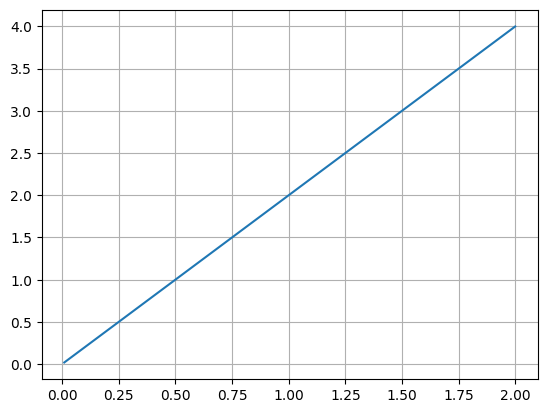

In [25]:
omega_space = np.arange(0.01,2,0.001)

plt.plot(omega_space, 2*omega_space/1)
plt.grid()
plt.show()